# Assignment 5 Question 2

## Problem Statement

##### Prepare a prediction model for predicting Price.
Do transformations for getting better predictions
make a table containing R^2 value for each prepared model.

Consider only the below columns
Corolla<-Corolla[c("Price","Age_08_04","KM","HP","cc","Doors","Gears","Quarterly_Tax","Weight")]

**Field Description**
- **Price** -- Offer Price in EUROs
- **Age_08_04** -- Age in months as in August 2004
- **KM** -- Accumulated Kilometers on odometer
- **HP** -- Horse Power
- **cc** -- Cylinder Volume in cubic centimeters
- **Doors** -- Number of doors
- **Gears** -- Number of gear positions
- **Quarterly_Tax** -- Quarterly road tax in EUROs
- **Weight** -- Weight in Kilograms

In [1]:
# Importing Libraries
import pandas as pd
import numpy as np
import seaborn as sns
import statsmodels.formula.api as smf
from statsmodels.graphics.regressionplots import influence_plot
import matplotlib.pyplot as plt
import statsmodels.api as sm

In [2]:
# Loading data
data = pd.read_csv('ToyotaCorolla copy.csv')
data.head()

,Id,Price,Age_08_04,Mfg_Month,Mfg_Year,KM,Fuel_Type,HP,Met_Color,Color,...,Central_Lock,Powered_Windows,Power_Steering,Radio,Mistlamps,Sport_Model,Backseat_Divider,Metallic_Rim,Radio_cassette,Tow_Bar
0,1,13500,23,10,2002,46986,Diesel,90,1,Blue,...,1,1,1,0,0,0,1,0,0,0
1,2,13750,23,10,2002,72937,Diesel,90,1,Silver,...,1,0,1,0,0,0,1,0,0,0
2,3,13950,24,9,2002,41711,Diesel,90,1,Blue,...,0,0,1,0,0,0,1,0,0,0
3,4,14950,26,7,2002,48000,Diesel,90,0,Black,...,0,0,1,0,0,0,1,0,0,0
4,5,13750,30,3,2002,38500,Diesel,90,0,Black,...,1,1,1,0,1,0,1,0,0,0


In [3]:
df = data[["Price","Age_08_04","KM","HP","cc","Doors","Gears","Quarterly_Tax","Weight"]]
df = df.rename({'Age_08_04':'Age','cc':'CC','Quarterly_Tax':'QT'},axis=1)
df.head()

,Price,Age,KM,HP,CC,Doors,Gears,QT,Weight
0,13500,23,46986,90,2000,3,5,210,1165
1,13750,23,72937,90,2000,3,5,210,1165
2,13950,24,41711,90,2000,3,5,210,1165
3,14950,26,48000,90,2000,3,5,210,1165
4,13750,30,38500,90,2000,3,5,210,1170


## Exploratory Data Analysis

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1436 entries, 0 to 1435
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   Price   1436 non-null   int64
 1   Age     1436 non-null   int64
 2   KM      1436 non-null   int64
 3   HP      1436 non-null   int64
 4   CC      1436 non-null   int64
 5   Doors   1436 non-null   int64
 6   Gears   1436 non-null   int64
 7   QT      1436 non-null   int64
 8   Weight  1436 non-null   int64
dtypes: int64(9)
memory usage: 101.1 KB


## Insights
- **There are no NULL values. Will proceed with next steps**

In [5]:
df.isna().sum()

Price     0
Age       0
KM        0
HP        0
CC        0
Doors     0
Gears     0
QT        0
Weight    0
dtype: int64

In [6]:
df[df.duplicated()]

,Price,Age,KM,HP,CC,Doors,Gears,QT,Weight
113,24950,8,13253,116,2000,5,5,234,1320


In [7]:
df = df.drop_duplicates().reset_index(drop=True)

In [8]:
df.describe()

,Price,Age,KM,HP,CC,Doors,Gears,QT,Weight
count,1435.000000,1435.000000,1435.000000,1435.000000,1435.000000,1435.000000,1435.000000,1435.000000,1435.000000
mean,10720.915679,55.980488,68571.782578,101.491986,1576.560976,4.032753,5.026481,87.020209,1072.287108
std,3608.732978,18.563312,37491.094553,14.981408,424.387533,0.952667,0.188575,40.959588,52.251882
min,4350.000000,1.000000,1.000000,69.000000,1300.000000,2.000000,3.000000,19.000000,1000.000000
25%,8450.000000,44.000000,43000.000000,90.000000,1400.000000,3.000000,5.000000,69.000000,1040.000000
50%,9900.000000,61.000000,63451.000000,110.000000,1600.000000,4.000000,5.000000,85.000000,1070.000000
75%,11950.000000,70.000000,87041.500000,110.000000,1600.000000,5.000000,5.000000,85.000000,1085.000000
max,32500.000000,80.000000,243000.000000,192.000000,16000.000000,5.000000,6.000000,283.000000,1615.000000


In [9]:
# Correlation Matrix
df.corr()

,Price,Age,KM,HP,CC,Doors,Gears,QT,Weight
Price,1.000000,-0.876273,-0.569420,0.314134,0.124375,0.183604,0.063831,0.211508,0.575869
Age,-0.876273,1.000000,0.504575,-0.155293,-0.096549,-0.146929,-0.005629,-0.193319,-0.466484
KM,-0.569420,0.504575,1.000000,-0.332904,0.103822,-0.035193,0.014890,0.283312,-0.023969
HP,0.314134,-0.155293,-0.332904,1.000000,0.035207,0.091803,0.209642,-0.302287,0.087143
CC,0.124375,-0.096549,0.103822,0.035207,1.000000,0.079254,0.014732,0.305982,0.335077
Doors,0.183604,-0.146929,-0.035193,0.091803,0.079254,1.000000,-0.160101,0.107353,0.301734
Gears,0.063831,-0.005629,0.014890,0.209642,0.014732,-0.160101,1.000000,-0.005125,0.021238
QT,0.211508,-0.193319,0.283312,-0.302287,0.305982,0.107353,-0.005125,1.000000,0.621988
Weight,0.575869,-0.466484,-0.023969,0.087143,0.335077,0.301734,0.021238,0.621988,1.000000


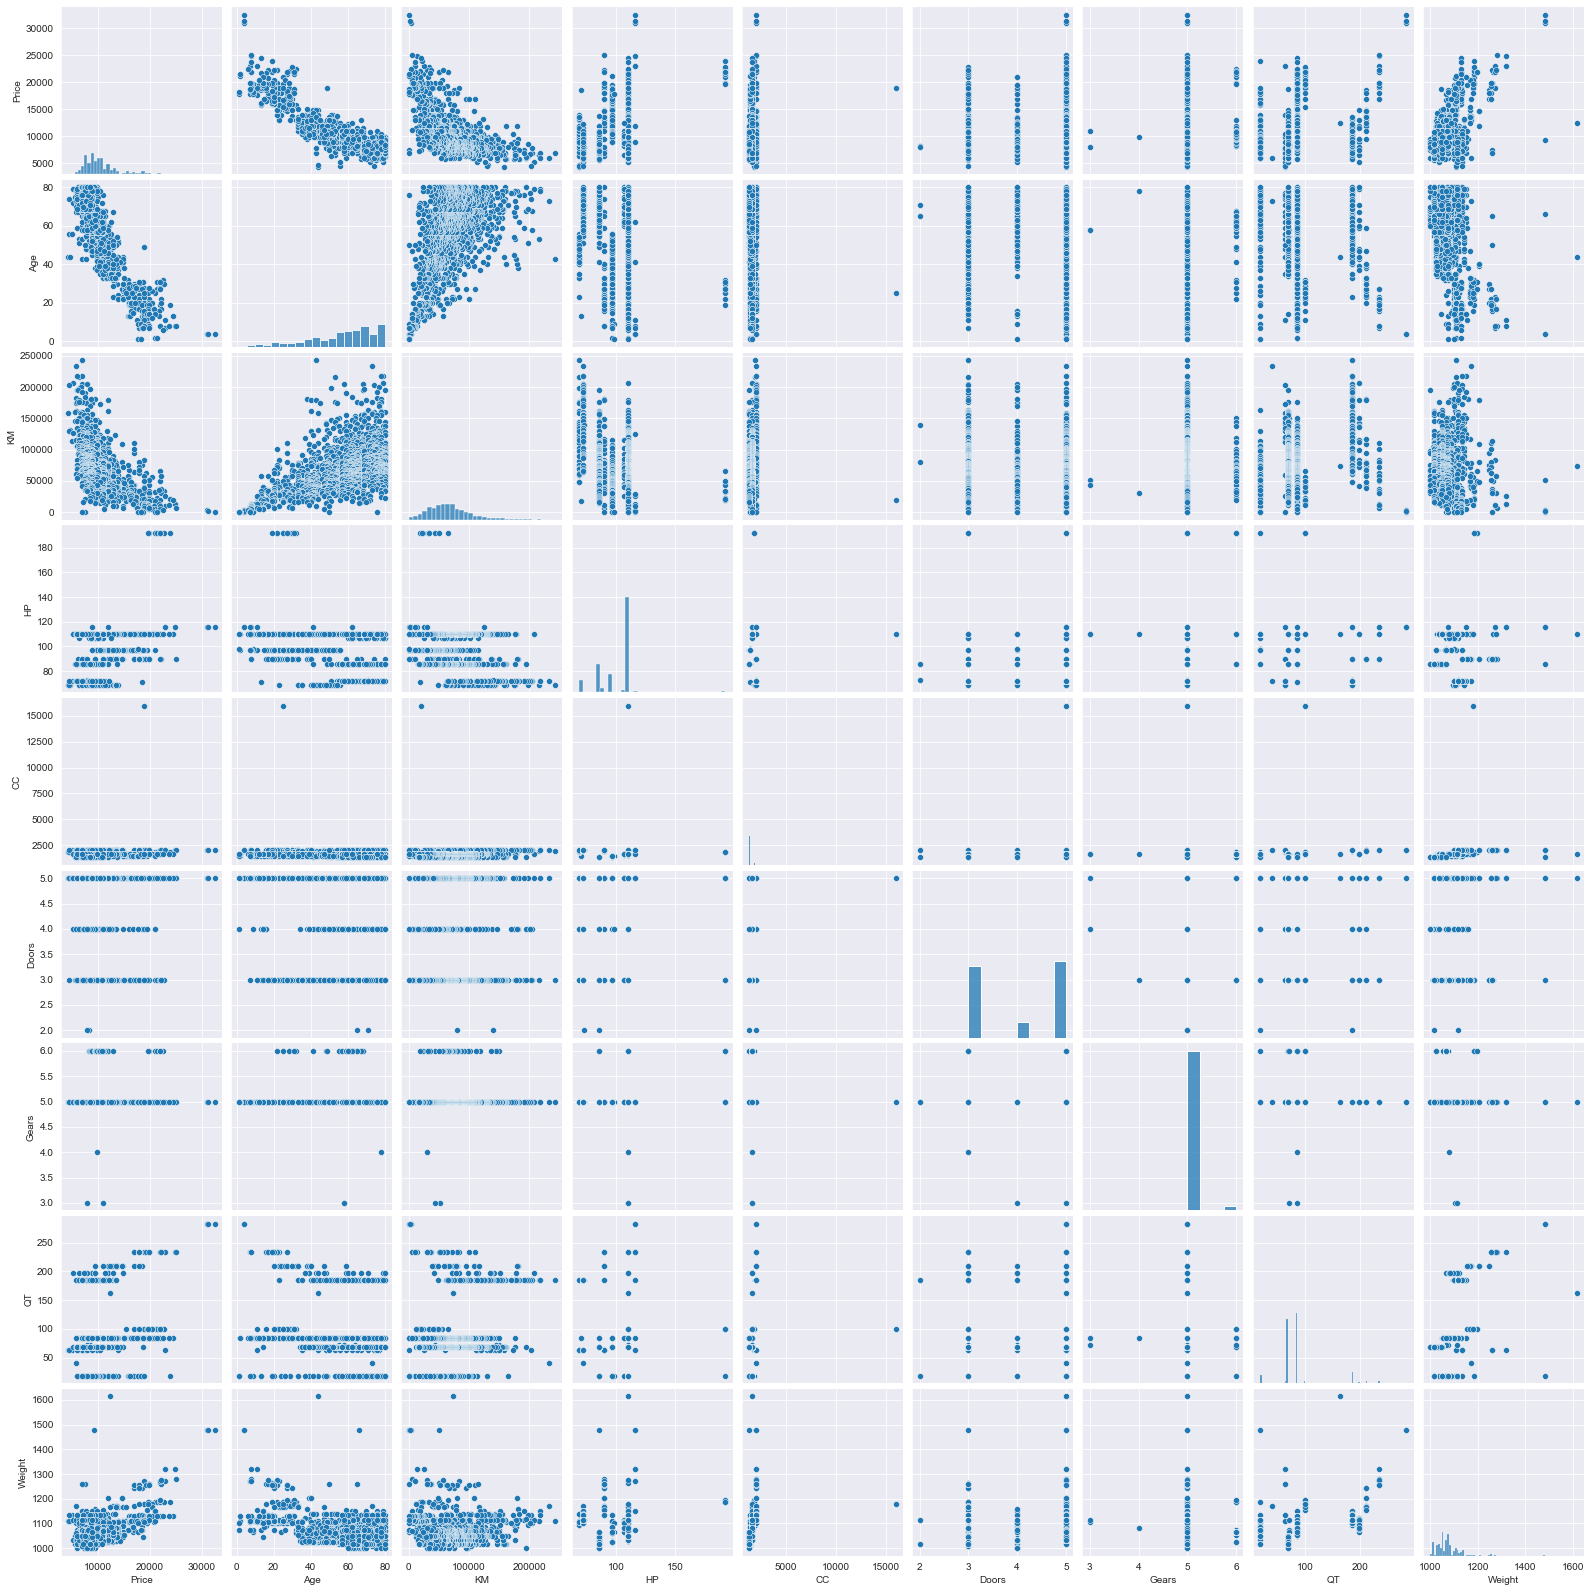

In [10]:
# Scatterplot matrix
sns.set_style('darkgrid')
sns.pairplot(df)

## Preparing Model 1

In [23]:
model = smf.ols('Price~Age+KM+HP+CC+Doors+Gears+QT+Weight', data=df).fit()
# print(model.summary())

In [24]:
model.params

Intercept   -5472.540368
Age          -121.713891
KM             -0.020737
HP             31.584612
CC             -0.118558
Doors          -0.920189
Gears         597.715894
QT              3.858805
Weight         16.855470
dtype: float64

In [25]:
print(model.tvalues, '\n', model.pvalues)

Intercept    -3.875273
Age         -46.551876
KM          -16.552424
HP           11.209719
CC           -1.316436
Doors        -0.023012
Gears         3.034563
QT            2.944198
Weight       15.760663
dtype: float64 
 Intercept     1.113392e-04
Age          1.879217e-288
KM            1.994713e-56
HP            5.211155e-28
CC            1.882393e-01
Doors         9.816443e-01
Gears         2.452430e-03
QT            3.290363e-03
Weight        1.031118e-51
dtype: float64


In [26]:
model.rsquared, model.rsquared_adj, model.aic

(0.8625200256947, 0.8617487495415146, 24750.407207346932)

##### **Insight**
##### - From pvalues it can be observed that `CC` & `Doors` are insignificant variables

## Initiating the list to store the R-Square Values for every model

In [27]:
R_Squared_list = []
model_r_square = ['model',model.rsquared]
R_Squared_list.append(model_r_square)
R_Squared_list

[['model', 0.8625200256947]]

## Linear Models for Insignificant variables `CC` & `Doors` 
## & get their `pvalues`

In [28]:
slr_model_CC = smf.ols('Price~CC', data=df).fit()
slr_model_CC.tvalues, slr_model_CC.pvalues

(Intercept    24.879592
 CC            4.745039
 dtype: float64,
 Intercept    7.236022e-114
 CC            2.292856e-06
 dtype: float64)

## **Insight**
## - `CC` has significant pvalue

In [29]:
slr_model_D = smf.ols('Price~Doors', data=df).fit()
slr_model_D.tvalues, slr_model_D.pvalues

(Intercept    19.421546
 Doors         7.070520
 dtype: float64,
 Intercept    8.976407e-75
 Doors        2.404166e-12
 dtype: float64)

## **Insight**
## - `Doors` has significant pvalue

In [30]:
slr_model_CC_D = smf.ols('Price~Doors+CC', data=df).fit()
slr_model_CC_D.tvalues, slr_model_CC_D.pvalues

(Intercept    12.786341
 Doors         6.752236
 CC            4.268006
 dtype: float64,
 Intercept    1.580945e-35
 Doors        2.109558e-11
 CC           2.101878e-05
 dtype: float64)

## **Insight**
## - Variables have significant pvalue

## Model Validation

### 1. Collinearity Check
**VIF** = 1/(1-RSquare)

In [31]:
rsq_age = smf.ols('Age~KM+HP+CC+Doors+Gears+QT+Weight',data=df).fit().rsquared
vif_age = 1/(1-rsq_age)

rsq_km = smf.ols('KM~Age+HP+CC+Doors+Gears+QT+Weight',data=df).fit().rsquared
vif_km = 1/(1-rsq_km)

rsq_hp = smf.ols('HP~Age+KM+CC+Doors+Gears+QT+Weight',data=df).fit().rsquared
vif_hp = 1/(1-rsq_hp)

rsq_cc = smf.ols('CC~Age+KM+HP+Doors+Gears+QT+Weight',data=df).fit().rsquared
vif_cc = 1/(1-rsq_cc)

rsq_dr = smf.ols('Doors~Age+KM+HP+CC+Gears+QT+Weight',data=df).fit().rsquared
vif_dr = 1/(1-rsq_dr)

rsq_gr = smf.ols('Gears~Age+KM+HP+CC+Doors+QT+Weight',data=df).fit().rsquared
vif_gr = 1/(1-rsq_gr)

rsq_qt = smf.ols('QT~Age+KM+HP+CC+Doors+Gears+Weight',data=df).fit().rsquared
vif_qt = 1/(1-rsq_qt)

rsq_wt = smf.ols('Weight~Age+KM+HP+CC+Doors+Gears+QT',data=df).fit().rsquared
vif_wt = 1/(1-rsq_wt)

vif_age, vif_km, vif_hp, vif_cc, vif_dr, vif_gr, vif_qt, vif_wt

(1.8762358497682896,
 1.75717802398104,
 1.4191801087182139,
 1.1634703645940854,
 1.1558898658142074,
 1.0988429081631146,
 2.295374508985715,
 2.4871800071791843)

In [32]:
# Putting the values in a DataFrame
df_vif = pd.DataFrame({'Variables':['Age','KM','HP','CC', 'Doors', 'Gears', 'QT', 'Weight'], 
                       'VIF':[vif_age, vif_km, vif_hp, vif_cc, vif_dr, vif_gr, vif_qt, vif_wt]})
df_vif

,Variables,VIF
0,Age,1.876236
1,KM,1.757178
2,HP,1.419180
3,CC,1.163470
4,Doors,1.155890
5,Gears,1.098843
6,QT,2.295375
7,Weight,2.487180


##### **Insight**
##### - None of the variables has VIF>20, So no collinearity. Hence, will consider all the variables in the Regression Model

### 1. Residual Analysis
Test for Normality of Residuals (Q-Q Plot) using residual model

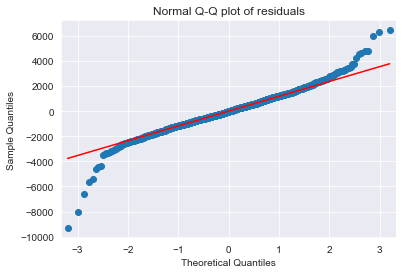

In [33]:
qqplot = sm.qqplot(model.resid, line='q')
plt.title('Normal Q-Q plot of residuals')
plt.show()

In [34]:
list(np.where(model.resid< -4000) or np.where(model.resid< 6000))

[array([190, 191, 220, 392, 401, 600, 653, 959])]

##### **Insights**
##### -Indexes [190, 191, 220, 392, 401, 600, 653, 959] seems like outliers

### Residual Plot for Homoscedasticity

In [35]:
def get_standardized_values(vals):
    return (vals-vals.mean())/vals.std()

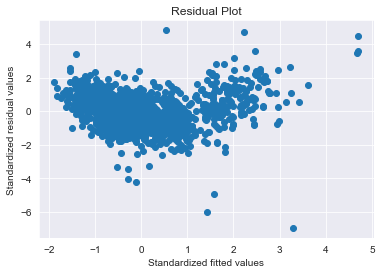

In [36]:
plt.scatter(get_standardized_values(model.fittedvalues),get_standardized_values(model.resid))
plt.title('Residual Plot')
plt.xlabel('Standardized fitted values')
plt.ylabel('Standardized residual values')
plt.show()

### Residual vs Regressors

eval_env: 1


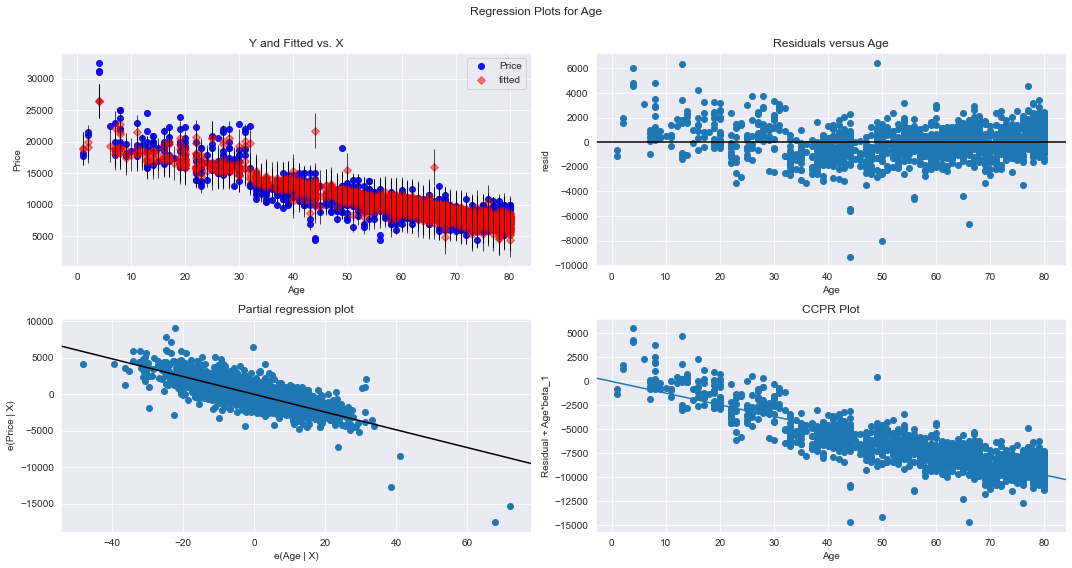

In [37]:
fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(model, 'Age',fig=fig)
plt.show()

eval_env: 1


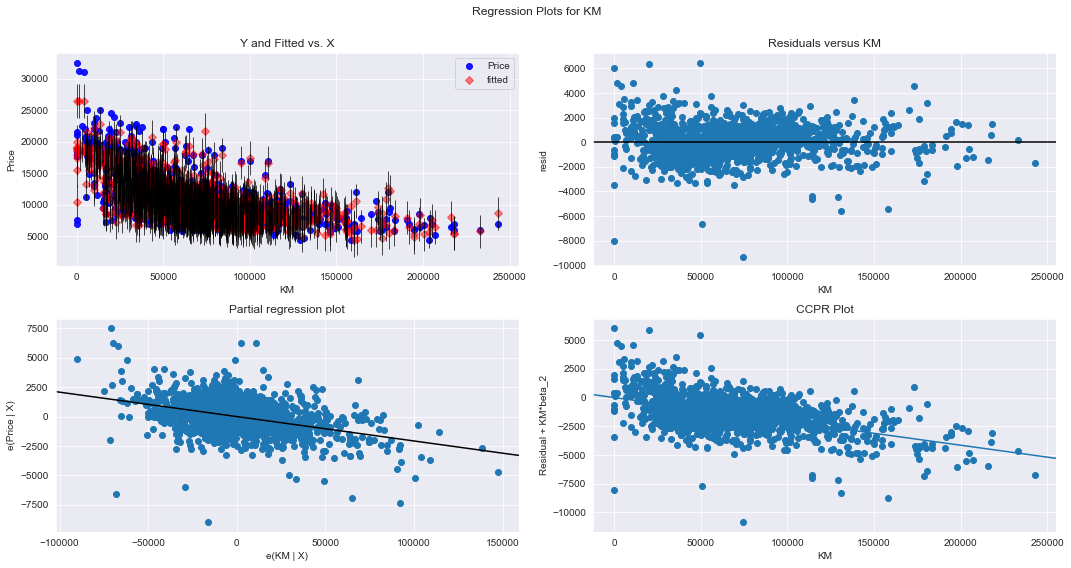

In [38]:
fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(model, 'KM',fig=fig)
plt.show()

eval_env: 1


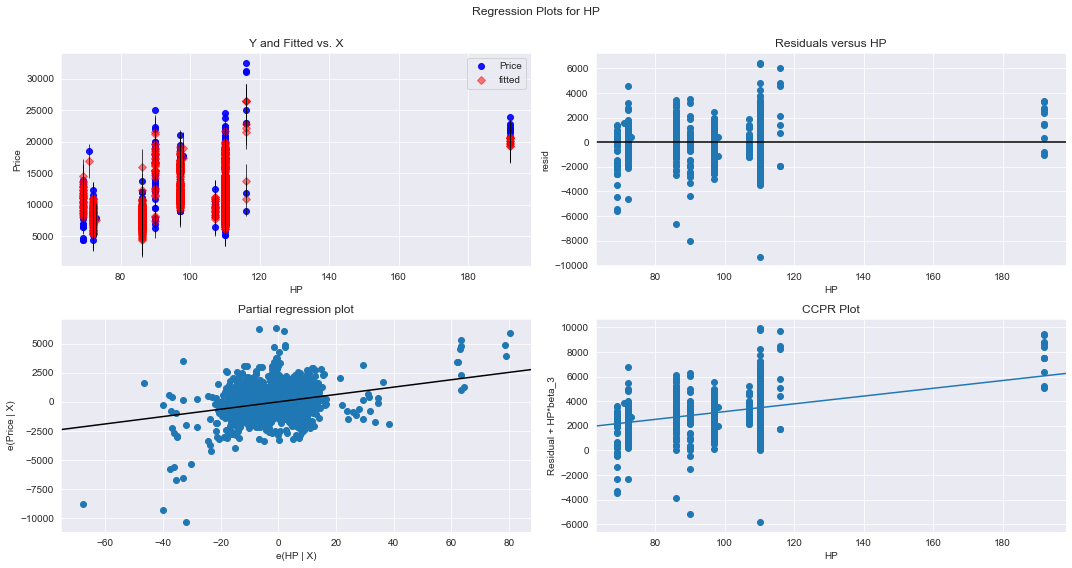

In [39]:
fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(model, 'HP',fig=fig)
plt.show()

eval_env: 1


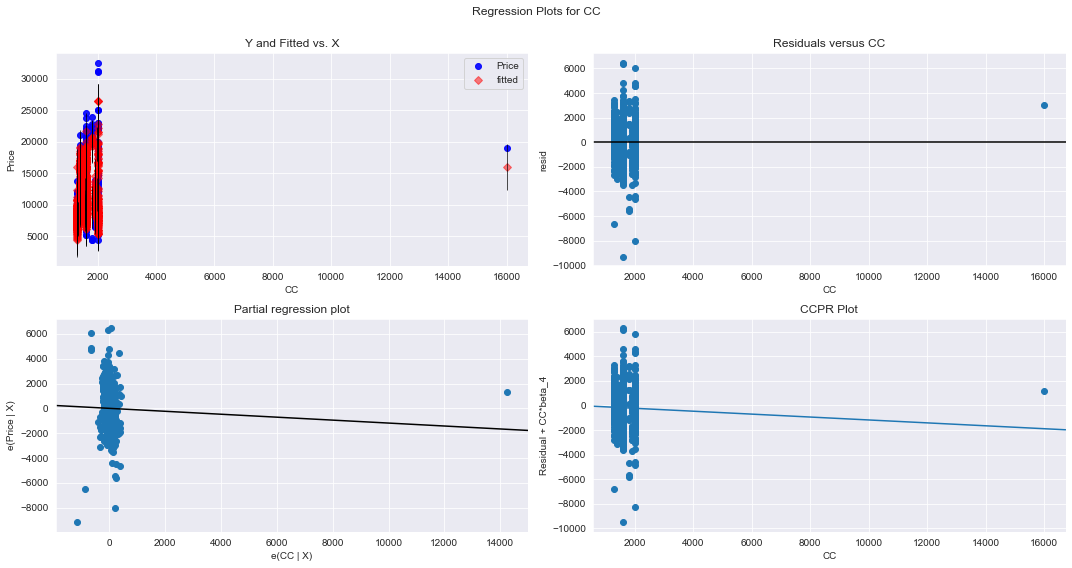

In [40]:
fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(model, 'CC',fig=fig)
plt.show()

eval_env: 1


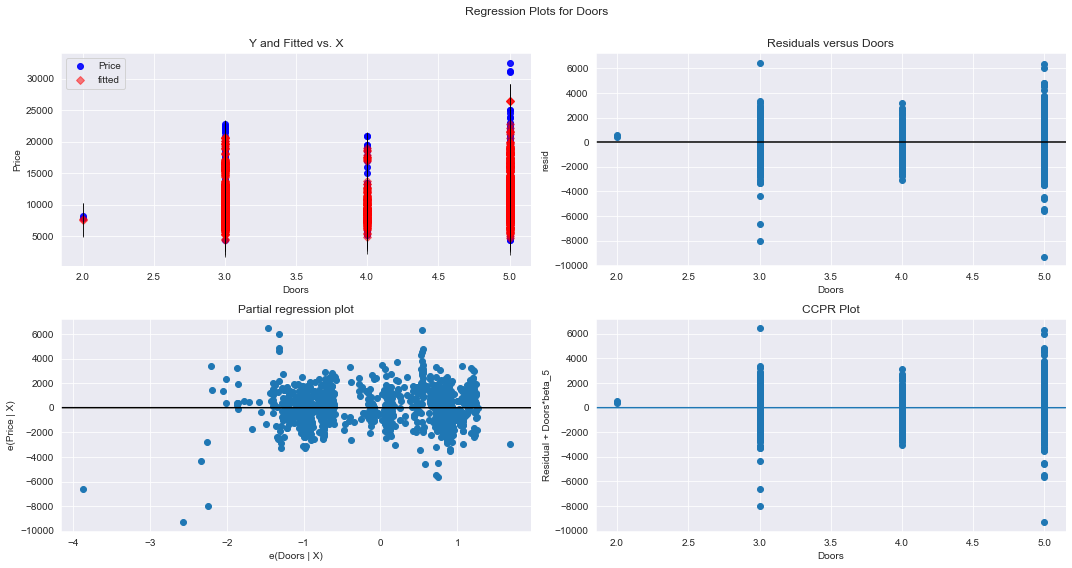

In [41]:
fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(model, 'Doors',fig=fig)
plt.show()

eval_env: 1


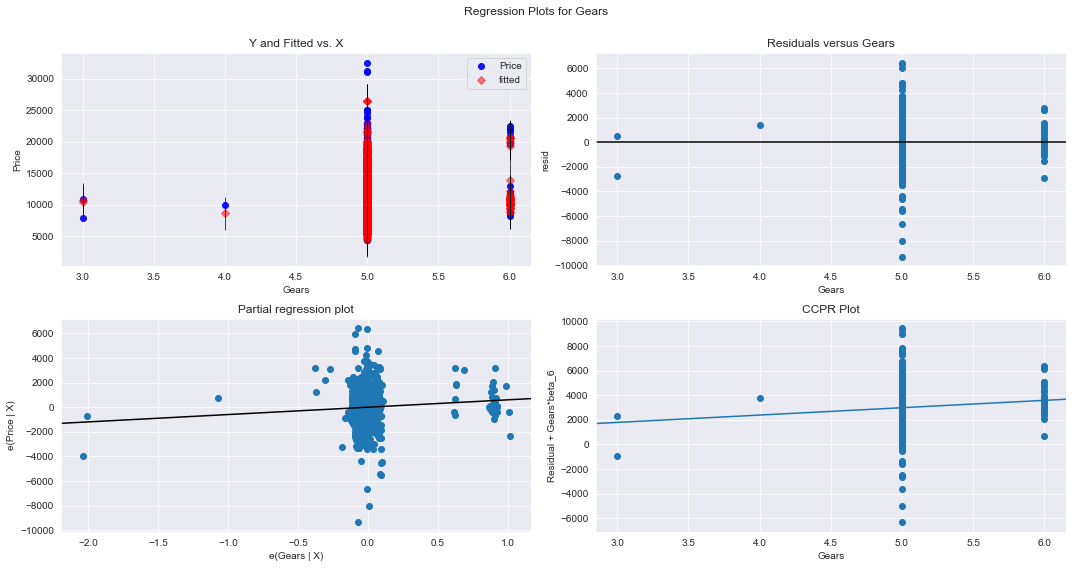

In [42]:
fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(model, 'Gears',fig=fig)
plt.show()

eval_env: 1


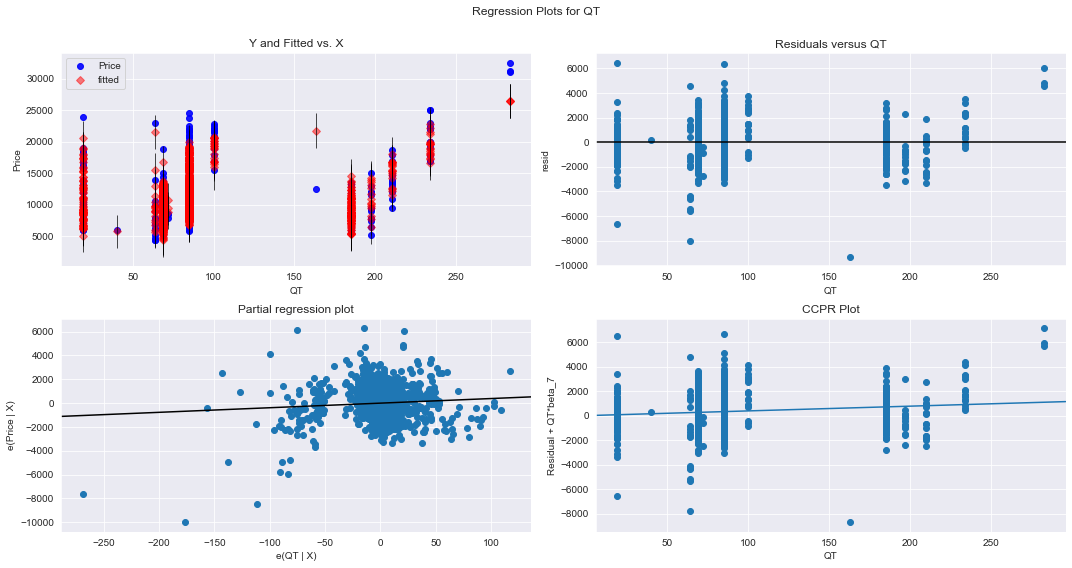

In [43]:
fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(model, 'QT',fig=fig)
plt.show()

eval_env: 1


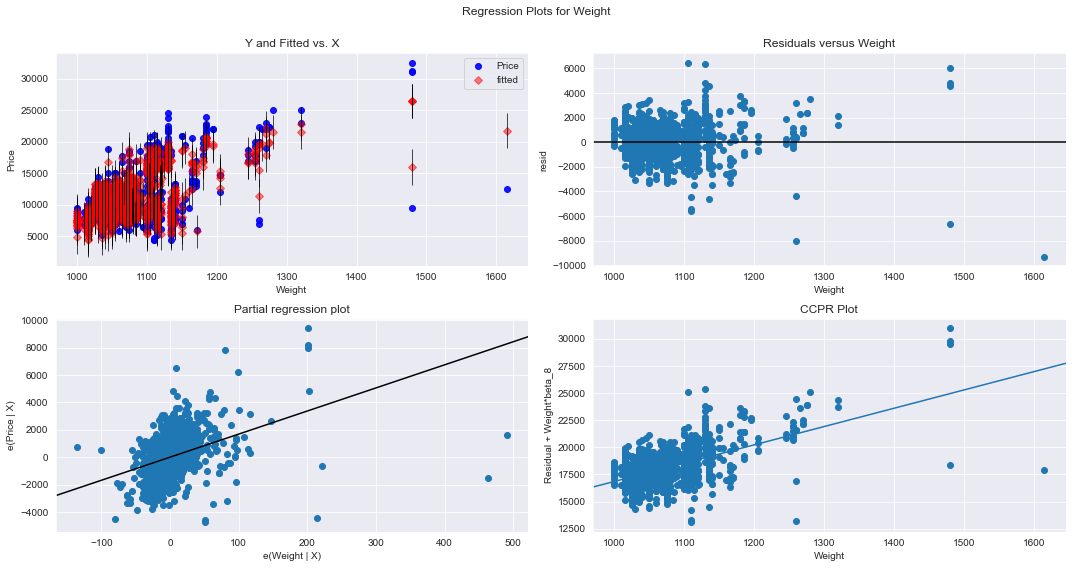

In [44]:
fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(model, 'Weight',fig=fig)
plt.show()

## Model Deletion Diagnostics
## Detecting Influencers/Outliers

### Cook's Distance
#### - As a general rule of thumb I'll Assume If Cook's Distance > 4/n then, it's an Outlier

In [45]:
cook_distance_threshold = 4/(df.shape[0])
cook_distance_threshold

0.0027874564459930314

In [46]:
model_influence = model.get_influence()
c, _ = model_influence.cooks_distance
c

array([7.22221054e-03, 3.94547973e-03, 5.44224039e-03, ...,
       8.04110550e-07, 6.99854767e-04, 1.08408002e-02])

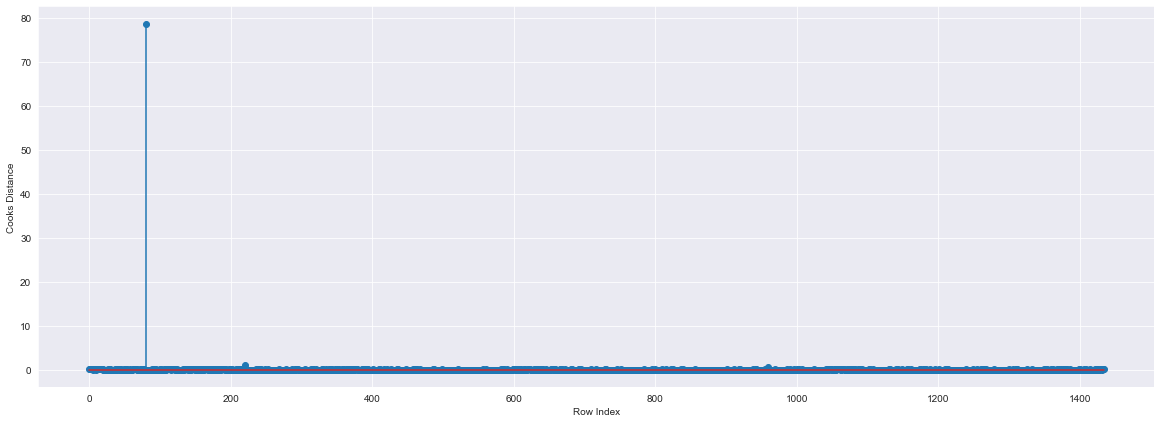

In [47]:
# Plot the influencers values using stem plot
fig = plt.subplots(figsize=(20,7))
plt.stem(np.arange(len(df)), np.round(c,3))
plt.xlabel('Row Index')
plt.ylabel('Cooks Distance')
plt.show()

In [48]:
# Index and value of Incfluencer where c is more than .5
np.argmax(c),np.max(c)

(80, 78.7295058224493)

##### **Insights**
##### -For index 80 the Cook's distance is high hence these points are influencial data points

### Leverage Value using High Influence Points
- Points beyond Leverage_cutoff value are influencers
- Leverage_cutoff value = 3*(k+1)/n; k = No.of features & n = No. of Data Points

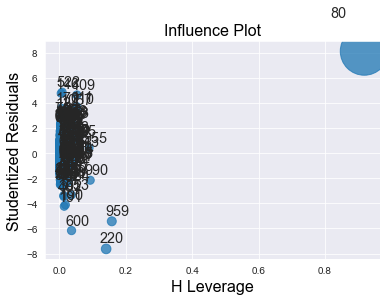

In [49]:
influence_plot(model)
plt.show()

In [50]:
k = df.shape[1]
n = df.shape[0]
leverage_cutoff = 3*((k+1)/n)
leverage_cutoff

0.020905923344947737

In [51]:
df[df.index.isin([80])]

,Price,Age,KM,HP,CC,Doors,Gears,QT,Weight
80,18950,25,20019,110,16000,5,5,100,1180


## Improving the Model

## Preparing Model 2

### As per the Insight generated from the Cook's distance we'll remove index 80

In [52]:
df_new = df.drop(df.index[[80]],axis=0).reset_index()
df_new = df_new.drop(['index'],axis=1)
df_new.head(2)

,Price,Age,KM,HP,CC,Doors,Gears,QT,Weight
0,13500,23,46986,90,2000,3,5,210,1165
1,13750,23,72937,90,2000,3,5,210,1165


In [53]:
model2 = smf.ols('Price~Age+KM+HP+CC+Doors+Gears+QT+Weight', data=df_new).fit()
# print(model2.summary())

In [54]:
# model2.params

In [55]:
# print(model2.tvalues, '\n', model2.pvalues)

In [56]:
model2.rsquared, model2.rsquared_adj, model2.aic

(0.8681163912634055, 0.8673759920564632, 24669.363894157)

In [57]:
model_r_square = ['model2',model2.rsquared]
R_Squared_list.append(model_r_square)
R_Squared_list

[['model', 0.8625200256947], ['model2', 0.8681163912634055]]

### **Insight**
#### - `model2` is slightly better than `model1` since it has a better rsquared value

## Preparing Model 3

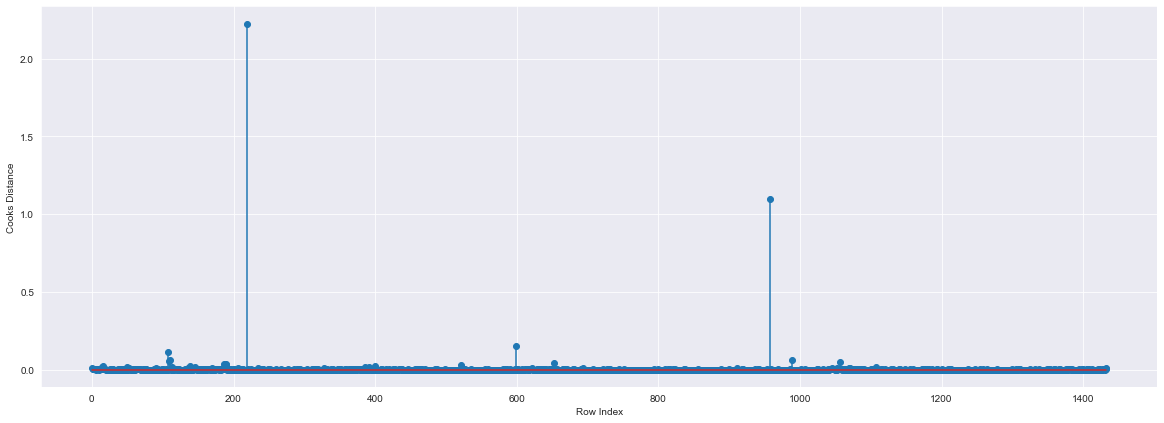

In [58]:
c, _ = model2.get_influence().cooks_distance

# Plot the influencers values using stem plot
fig = plt.subplots(figsize=(20,7))
plt.stem(np.arange(len(df_new)), np.round(c,3))
plt.xlabel('Row Index')
plt.ylabel('Cooks Distance')
plt.show()

In [61]:
influencer_indexes = []
for index in range(len(c)):
    if c[index] > 0.5:
        influencer_indexes.append(index)
        
influencer_indexes

[219, 958]

### From the above Cook's distance chart index 219 & 958 are influencer points

In [62]:
df_new2 = df_new.drop(df_new.index[influencer_indexes],axis=0).reset_index()
df_new2 = df_new2.drop(['index'],axis=1)
df_new2.head(2)

,Price,Age,KM,HP,CC,Doors,Gears,QT,Weight
0,13500,23,46986,90,2000,3,5,210,1165
1,13750,23,72937,90,2000,3,5,210,1165


In [63]:
model3 = smf.ols('Price~Age+KM+HP+CC+Doors+Gears+QT+Weight', data=df_new2).fit()

In [64]:
# model3.params

In [65]:
# print(model3.tvalues, '\n', model3.pvalues)

In [66]:
model3.rsquared, model3.rsquared_adj, model3.aic

(0.8839684606741538, 0.8833161400033128, 24453.23573612724)

In [67]:
model_r_square = ['model3',model3.rsquared]
R_Squared_list.append(model_r_square)
R_Squared_list

[['model', 0.8625200256947],
 ['model2', 0.8681163912634055],
 ['model3', 0.8839684606741538]]

## Preparing Model 4

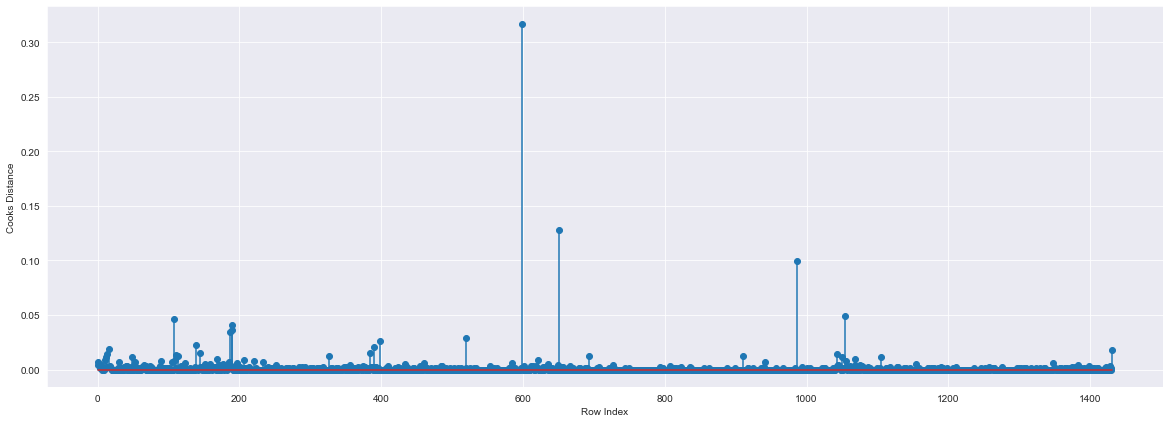

In [68]:
c, _ = model3.get_influence().cooks_distance

# Plot the influencers values using stem plot
fig = plt.subplots(figsize=(20,7))
plt.stem(np.arange(len(df_new2)), np.round(c,3))
plt.xlabel('Row Index')
plt.ylabel('Cooks Distance')
plt.show()

In [70]:
influencer_indexes = []
for index in range(len(c)):
    if c[index] > 0.05:
        influencer_indexes.append(index)
        
influencer_indexes

[598, 651, 987]

### From the above Cook's distance chart indexes [598, 651, 987] are influencer points

In [71]:
df_new3 = df_new2.drop(df_new2.index[influencer_indexes],axis=0).reset_index()
df_new3 = df_new3.drop(['index'],axis=1)
df_new3.head(2)

,Price,Age,KM,HP,CC,Doors,Gears,QT,Weight
0,13500,23,46986,90,2000,3,5,210,1165
1,13750,23,72937,90,2000,3,5,210,1165


In [72]:
model4 = smf.ols('Price~Age+KM+HP+CC+Doors+Gears+QT+Weight', data=df_new3).fit()

In [73]:
# model4.params

In [74]:
# print(model4.tvalues, '\n', model4.pvalues)

In [75]:
model4.rsquared, model4.rsquared_adj, model4.aic

(0.8909888960319987, 0.8903747489673902, 24313.37698077585)

In [76]:
model_r_square = ['model4',model4.rsquared]
R_Squared_list.append(model_r_square)
R_Squared_list

[['model', 0.8625200256947],
 ['model2', 0.8681163912634055],
 ['model3', 0.8839684606741538],
 ['model4', 0.8909888960319987]]

## Preparing Model 5

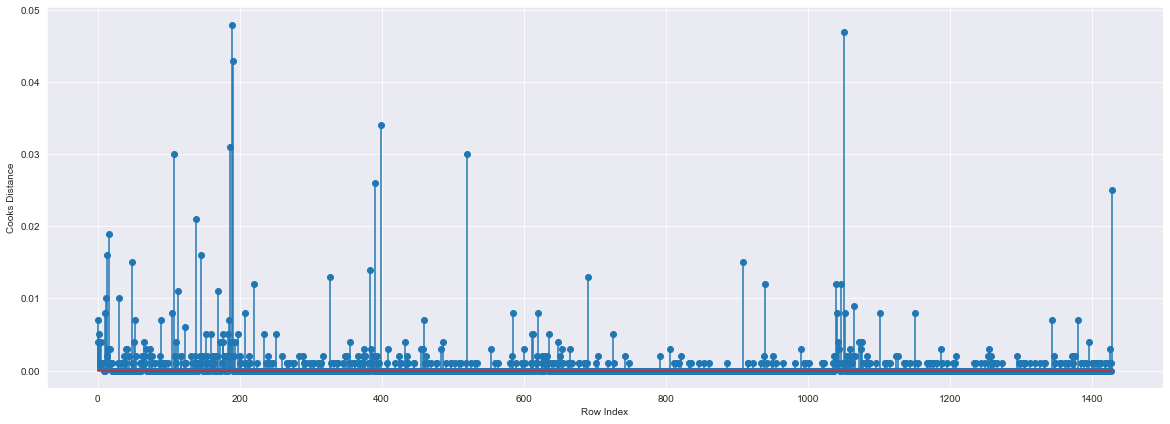

In [77]:
c, _ = model4.get_influence().cooks_distance

# Plot the influencers values using stem plot
fig = plt.subplots(figsize=(20,7))
plt.stem(np.arange(len(df_new3)), np.round(c,3))
plt.xlabel('Row Index')
plt.ylabel('Cooks Distance')
plt.show()

In [80]:
influencer_indexes = []
for index in range(len(c)):
    if c[index] > 0.01:
        influencer_indexes.append(index)
        
influencer_indexes

[12,
 14,
 16,
 49,
 108,
 113,
 139,
 145,
 169,
 187,
 189,
 190,
 220,
 327,
 384,
 390,
 399,
 520,
 691,
 908,
 939,
 1040,
 1047,
 1051,
 1428]

**From the above Cook's distance chart indexes [12,
 14,
 16,
 49,
 108,
 113,
 139,
 145,
 169,
 187,
 189,
 190,
 220,
 327,
 384,
 390,
 399,
 520,
 691,
 908,
 939,
 1040,
 1047,
 1051,
 1428] are influencer points**

In [81]:
df_new4 = df_new3.drop(df_new3.index[influencer_indexes],axis=0).reset_index()
df_new4 = df_new4.drop(['index'],axis=1)
df_new4.head(2)

,Price,Age,KM,HP,CC,Doors,Gears,QT,Weight
0,13500,23,46986,90,2000,3,5,210,1165
1,13750,23,72937,90,2000,3,5,210,1165


In [82]:
model5 = smf.ols('Price~Age+KM+HP+CC+Doors+Gears+QT+Weight', data=df_new4).fit()

In [83]:
# model5.params

In [84]:
# print(model5.tvalues, '\n', model5.pvalues)

In [85]:
model5.rsquared, model5.rsquared_adj, model5.aic

(0.8990250446583399, 0.8984459768140867, 23645.083902234743)

In [86]:
model_r_square = ['model5',model5.rsquared]
R_Squared_list.append(model_r_square)
R_Squared_list

[['model', 0.8625200256947],
 ['model2', 0.8681163912634055],
 ['model3', 0.8839684606741538],
 ['model4', 0.8909888960319987],
 ['model5', 0.8990250446583399]]

## Preparing Model 6

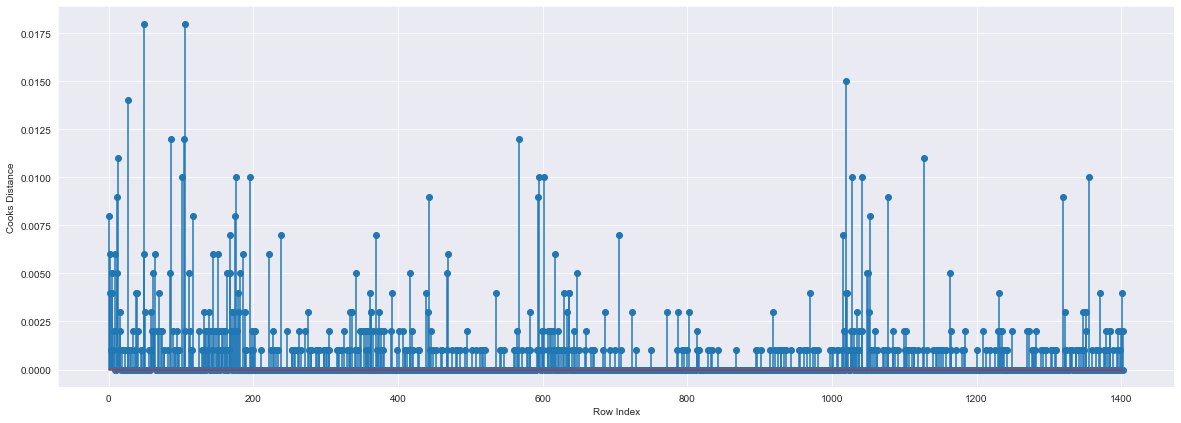

In [87]:
c, _ = model5.get_influence().cooks_distance

# Plot the influencers values using stem plot
fig = plt.subplots(figsize=(20,7))
plt.stem(np.arange(len(df_new4)), np.round(c,3))
plt.xlabel('Row Index')
plt.ylabel('Cooks Distance')
plt.show()

In [97]:
influencer_indexes = []
for index in range(len(c)):
    if c[index] > 0.0125:
        influencer_indexes.append(index)
        
influencer_indexes

[27, 49, 105, 1019]

**From the above Cook's distance chart indexes [27, 49, 105, 1019] are influencer points**

In [98]:
df_new5 = df_new4.drop(df_new4.index[influencer_indexes],axis=0).reset_index()
df_new5 = df_new5.drop(['index'],axis=1)
df_new5.head(2)

,Price,Age,KM,HP,CC,Doors,Gears,QT,Weight
0,13500,23,46986,90,2000,3,5,210,1165
1,13750,23,72937,90,2000,3,5,210,1165


In [99]:
model6 = smf.ols('Price~Age+KM+HP+CC+Doors+Gears+QT+Weight', data=df_new5).fit()

In [100]:
# model5.params

In [101]:
# print(model5.tvalues, '\n', model5.pvalues)

In [102]:
model6.rsquared, model6.rsquared_adj, model6.aic

(0.8965559452512113, 0.8959610117947121, 23564.125134296126)

In [103]:
model_r_square = ['model6',model6.rsquared]
R_Squared_list.append(model_r_square)
R_Squared_list

[['model', 0.8625200256947],
 ['model2', 0.8681163912634055],
 ['model3', 0.8839684606741538],
 ['model4', 0.8909888960319987],
 ['model5', 0.8990250446583399],
 ['model6', 0.8981684965821582],
 ['model6', 0.8965559452512113]]

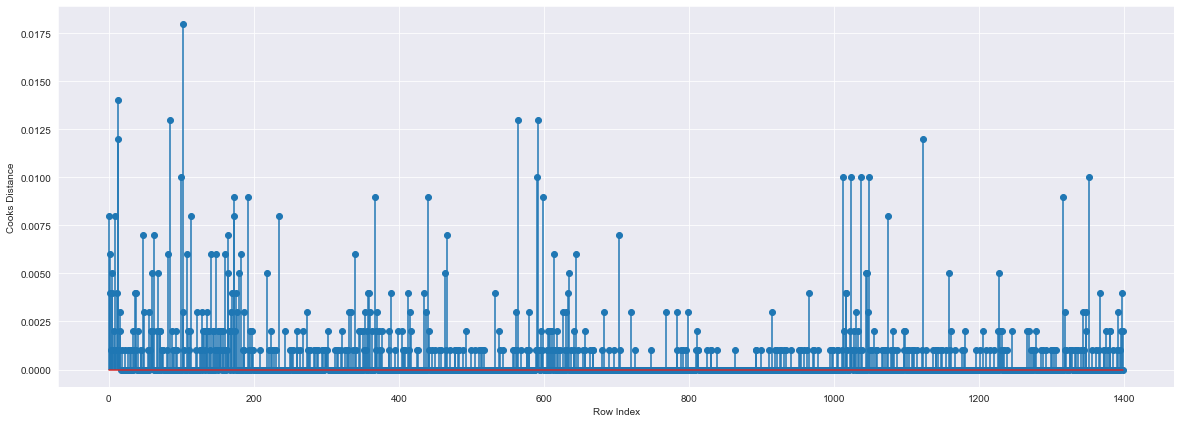

In [104]:
c, _ = model6.get_influence().cooks_distance

# Plot the influencers values using stem plot
fig = plt.subplots(figsize=(20,7))
plt.stem(np.arange(len(df_new5)), np.round(c,3))
plt.xlabel('Row Index')
plt.ylabel('Cooks Distance')
plt.show()

# **Insight:**
## Now we see that removing influencer points is not improving the Model Accuracy anymore
## So, will stop here

## Make a table containing R^2 value for each prepared model.

In [105]:
R_Squared_df = pd.DataFrame(R_Squared_list,columns=['Model_Name', 'R_Square_Value'])
R_Squared_df

,Model_Name,R_Square_Value
0,model,0.862520
1,model2,0.868116
2,model3,0.883968
3,model4,0.890989
4,model5,0.899025
5,model6,0.898168
6,model6,0.896556


# Best model R^2 is 0.899025